In [63]:
import gately
import shapley
import numpy as np
import random
import timeit
import shap

In [64]:
#X, y = shap.datasets.nhanesi()

In [65]:
shap_means = []
gately_means = []

for inter in range(0,50):

    datas = []
    
    coefs = [np.random.randint(0,10) for _ in range(0,inter)]
    for i in range(1000):
        data = []
        pop = random.uniform(-1,1)
        data.append(pop)
        for b in range(0,inter):
            
            data.append(pop*coefs[b])
        for i in range(0,50-inter):
            data.append(random.uniform(-1,1))
        datas.append(data)
    datas = np.asarray(datas)

    X = datas

    distributions_shap = []
    for _ in range(0,1000):
        i = np.random.randint(0,X.shape[0]-1)
        sample = X[i].copy()
        ref = X[i+1]

        number_inds = int(np.random.uniform(1,X.shape[1]-1))

        selected_indexes = []
        for ind in range(0,number_inds):
            selected_indexes.append(int(np.random.uniform(0,X.shape[1])))

        sample[selected_indexes] = ref[selected_indexes]
        distributions_shap.append(sample)
    distributions_shap = np.asarray(distributions_shap)

    distributions_gately = []
    for _ in range(0,1000):

        number_inds = int(np.random.randint(0,2))
        i = np.random.randint(0,X.shape[0]-1)
        if number_inds == 0:
            selected_ind =  int(np.random.uniform(0,X.shape[1]))
            sample = X[i].copy()
            ref = X[i+1]
            sample[selected_ind] = ref[selected_ind]
            distributions_gately.append(sample)
        elif number_inds == 1:
            selected_ind =  int(np.random.uniform(0,X.shape[1]))
            sample = X[i+1].copy()
            ref = X[i]
            sample[selected_ind] = ref[selected_ind]
            distributions_gately.append(sample)

    distributions_gately = np.asarray(distributions_gately)

    scores_gately = []
    scores_shap = []
    samples = X.copy()

    for i in range(0,10):
        X = np.concatenate([distributions_gately[0:100],samples[0:100]])
        Y = np.concatenate([np.zeros(100),np.ones(100)])
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import train_test_split

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

        regr = RandomForestClassifier(n_estimators=100)
        regr.fit(X_train, y_train)
        scores_gately.append(regr.score(X_test,y_test))

        X = np.concatenate([distributions_shap[0:100],samples[0:100]])
        Y = np.concatenate([np.zeros(100),np.ones(100)])

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

        regr = RandomForestClassifier(n_estimators=100)
        regr.fit(X_train, y_train)
        scores_shap.append(regr.score(X_test,y_test))
        
    gately_means.append(np.mean(scores_gately))
    shap_means.append(np.mean(scores_shap))
    

In [66]:
gately_means

[0.44666666666666666,
 0.475,
 0.47333333333333333,
 0.47833333333333333,
 0.4866666666666667,
 0.5149999999999999,
 0.4983333333333334,
 0.4133333333333334,
 0.3966666666666666,
 0.44333333333333336,
 0.5033333333333333,
 0.45,
 0.5,
 0.47833333333333333,
 0.45000000000000007,
 0.45166666666666666,
 0.5183333333333333,
 0.4833333333333333,
 0.47833333333333333,
 0.4583333333333333,
 0.43833333333333335,
 0.4616666666666667,
 0.445,
 0.4666666666666667,
 0.4633333333333334,
 0.515,
 0.5333333333333333,
 0.5200000000000001,
 0.47000000000000003,
 0.5016666666666667,
 0.5033333333333333,
 0.43166666666666675,
 0.4716666666666667,
 0.4416666666666667,
 0.47333333333333333,
 0.5333333333333333,
 0.475,
 0.5,
 0.4600000000000001,
 0.5066666666666667,
 0.44833333333333336,
 0.48166666666666663,
 0.4666666666666667,
 0.46333333333333326,
 0.4950000000000001,
 0.465,
 0.49333333333333335,
 0.495,
 0.4683333333333334,
 0.44666666666666666]

In [67]:
shap_means

[0.4616666666666666,
 0.5033333333333333,
 0.485,
 0.44666666666666666,
 0.5433333333333333,
 0.47833333333333333,
 0.5566666666666666,
 0.45500000000000007,
 0.505,
 0.5,
 0.4716666666666667,
 0.53,
 0.5700000000000001,
 0.48166666666666674,
 0.49333333333333335,
 0.5566666666666666,
 0.535,
 0.6183333333333333,
 0.5566666666666666,
 0.5883333333333333,
 0.51,
 0.5516666666666666,
 0.53,
 0.475,
 0.5283333333333332,
 0.5816666666666667,
 0.525,
 0.5783333333333334,
 0.5783333333333334,
 0.5333333333333334,
 0.5966666666666667,
 0.5966666666666668,
 0.6650000000000001,
 0.675,
 0.6266666666666667,
 0.6216666666666667,
 0.5799999999999998,
 0.6483333333333333,
 0.6583333333333334,
 0.6483333333333332,
 0.7233333333333334,
 0.64,
 0.6016666666666667,
 0.6933333333333334,
 0.6416666666666667,
 0.6533333333333333,
 0.7033333333333334,
 0.7183333333333334,
 0.655,
 0.6783333333333335]

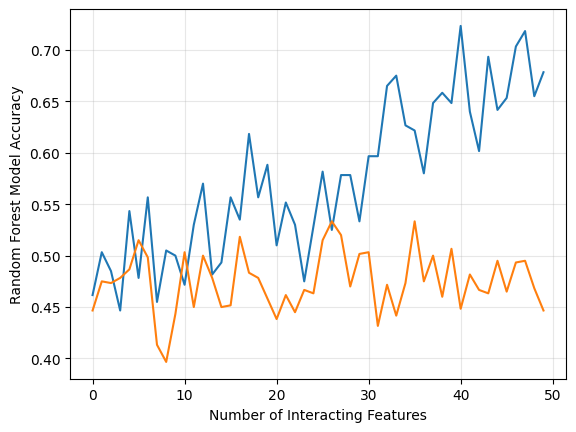

In [68]:
import matplotlib.pyplot as plt

depth = np.arange(0,50)
plt.plot(depth, shap_means)
plt.plot(depth, gately_means)
plt.xlabel('Number of Interacting Features')
plt.ylabel('Random Forest Model Accuracy')
plt.grid(alpha=0.3)
plt.savefig('final_distribution_synthetic.pdf')